In [2]:
pip install lifelines   # lifelines 패키지 설치

     |████████████████████████████████| 347 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 4.2 MB/s eta 0:00:01
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=fcbde7dd0385a99c675643b01ee1ed24bfc9312cf8be71379c30d2a1c8414e5f
  Stored in directory: /Users/skang-imacpro/Library/Caches/pip/wheels/85/f5/d2/3ef47d3a836b17620bf41647222825b065245862d12aa62885
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4035 sha256=caa912daeddd737a3af66e2d61f7ac06076c3011db99cf5a8ac540ef985a2b32
  Stored in directory: /Users/skang-imacpro/Library/Caches/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd autograd-gamma
Note: you may need to restart the kernel to use updated packages.


In [1]:
from lifelines import WeibullFitter   # lifelines 패키지 중 WeibullFitter 함수를 불러 옴
from lifelines.datasets import load_waltons  # lifelines 패키지 내장 자료인 waltons 자료를 불러 옴

In [2]:
waltons = load_waltons()  # waltons 자료를 불러와 waltons에 지정
waltons   # waltons 자료 출력

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137
...,...,...,...
158,60.0,1,control
159,60.0,1,control
160,60.0,1,control
161,60.0,1,control


In [4]:
wbf = WeibullFitter()  # WeibullFitter() 함수를 wbf에 지정

# Weibull 적합: fit(관측 시간, 사건 발생 지표)의 형태
wbf.fit(waltons['T'], waltons['E'])

# Weibull 적합 결과를 요약: 모수 추정치, 표준오차, 신뢰구간 및 모수에 대한 검정 (= 1에 대해)
wbf.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 163 total observations, 7 right-censored observations>
   number of observations = 163
number of events observed = 156
           log-likelihood = -672.06
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%     z      p   -log2(p)
lambda_  55.73       1.33            53.13            58.33 41.26 <0.005        inf
rho_      3.45       0.24             2.97             3.93 10.07 <0.005      76.83
---
AIC = 1348.12

In [5]:
wbf.survival_function_  # 생존 함수 추정치 계산

,Weibull_estimate
6.000000,0.999543
6.425926,0.999421
6.851852,0.999278
7.277778,0.999110
7.703704,0.998918
...,...
73.296296,0.076278
73.722222,0.072415
74.148148,0.068697
74.574074,0.065121


In [6]:
wbf.confidence_interval_survival_function_  # 생존 함수 추정치의 신뢰구간

,Weibull_estimate_lower_0.95,Weibull_estimate_upper_0.95
6.000000,0.999036,1.000050
6.425926,0.998797,1.000045
6.851852,0.998521,1.000034
7.277778,0.998205,1.000016
7.703704,0.997845,0.999991
...,...,...
73.296296,0.040290,0.112265
73.722222,0.037286,0.107545
74.148148,0.034433,0.102962
74.574074,0.031728,0.098515


Text(0.5, 1.0, 'Survival function plot under Weibull dist: waltons data')

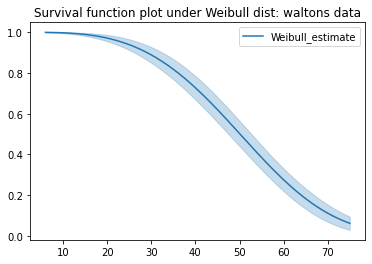

In [23]:
wbf_surv_plot = wbf.plot_survival_function()  # 생존 함수 그림 그리기
wbf_surv_plot.set_title("Survival function plot under Weibull dist: waltons data")

In [14]:
wbf_med_surv = wbf.median_survival_time_  # 중위수 (median survival time)
print(format(wbf_med_surv,"3.3f"))  # 소숫점 앞에 3자리, 뒤에 3자리로 출력

50.117


In [16]:
import numpy as np   # numpy 패키지 사용 (np란 이름으로)

In [17]:
timeline = np.linspace(0, 100, 200)  # 0부터 100까지를 200등분하는 배열 만들기
timeline

array([  0.        ,   0.50251256,   1.00502513,   1.50753769,
         2.01005025,   2.51256281,   3.01507538,   3.51758794,
         4.0201005 ,   4.52261307,   5.02512563,   5.52763819,
         6.03015075,   6.53266332,   7.03517588,   7.53768844,
         8.04020101,   8.54271357,   9.04522613,   9.54773869,
        10.05025126,  10.55276382,  11.05527638,  11.55778894,
        12.06030151,  12.56281407,  13.06532663,  13.5678392 ,
        14.07035176,  14.57286432,  15.07537688,  15.57788945,
        16.08040201,  16.58291457,  17.08542714,  17.5879397 ,
        18.09045226,  18.59296482,  19.09547739,  19.59798995,
        20.10050251,  20.60301508,  21.10552764,  21.6080402 ,
        22.11055276,  22.61306533,  23.11557789,  23.61809045,
        24.12060302,  24.62311558,  25.12562814,  25.6281407 ,
        26.13065327,  26.63316583,  27.13567839,  27.63819095,
        28.14070352,  28.64321608,  29.14572864,  29.64824121,
        30.15075377,  30.65326633,  31.15577889,  31.65

In [24]:
# timeline에 있는 시간에 대해 생존 함수의 값 추정
wbf.survival_function_at_times(timeline)

0.000000      1.000000
0.502513      1.000000
1.005025      0.999999
1.507538      0.999996
2.010050      0.999989
                ...   
97.989950     0.000904
98.492462     0.000798
98.994975     0.000704
99.497487     0.000619
100.000000    0.000544
Name: Weibull_estimate, Length: 200, dtype: float64

Text(0.5, 1.0, 'Survival function plot under Weibull dist: walton data with timeline')

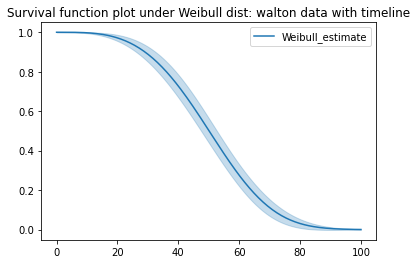

In [25]:
# timeline에 있는 시간에 대한 생존 함수를 추정하도록 적합
wbf_timeline = WeibullFitter().fit(waltons['T'], waltons['E'], timeline=timeline)
wbf_surv_timeline = wbf_timeline.plot_survival_function()   # 생존 함수 그림 그리기
wbf_surv_timeline.set_title("Survival function plot under Weibull dist: walton data with timeline")